# DS5110 IDMP Final Project

Team Members

*   Sanjiv Motilal Choudhari
*   Shivram Nekkanti



# Objective

In the dynamic world of motorsport, fan engagement and sentiment analysis play a vital role in understanding audience perception and preferences. This project explores the wealth of insights hidden within fan comments on online platforms, focusing on the 2024 Formula One season's first 20 races. By analyzing 100,000 scraped comments, this project aims to uncover trends, sentiments, and public opinions related to drivers, teams, and the races themselves.  

The objective is to apply Natural Language Processing (NLP) techniques to extract meaningful information from the comments. This includes identifying mentions of racers and racing teams, classifying emotions such as joy, anger, sadness, surprise, and fear, and understanding how fans perceive individual drivers and teams over time.  

# Section 1 : Data Loading and Preprocessing

This section covers loading the data from the zip file, extracting relevant comments based on keywords, and preparing the data for further analysis.

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
!unzip Data.zip

Archive:  Data.zip
  inflating: British.csv             
  inflating: Canada.csv              
  inflating: Chinese.csv             
  inflating: Emilia_Romagna.csv      
  inflating: Finale.csv              
  inflating: Hungarian.csv           
  inflating: Italian.csv             
  inflating: Japanese.csv            
  inflating: Miami.csv               
  inflating: Monaco.csv              
  inflating: Qatar.csv               
  inflating: Saudi.csv               
  inflating: australian.csv          
  inflating: Azerbaijan.csv          
  inflating: Baharain.csv            
  inflating: Belgian.csv             


In [5]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [7]:
import pandas as pd
import zipfile

# Path to the zip file
zip_file_path = '/content/Data.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get a list of all CSV files within the archive
    csv_files = [file for file in zip_ref.namelist() if file.endswith('.csv')]

    dataframes = []
    # Iterate through each CSV file
    for csv_file in csv_files:
        # Read the CSV file directly from the zip archive
        with zip_ref.open(csv_file, 'r') as file:
            df = pd.read_csv(file)
            dataframes.append(df)

# Concatenate all dataframes
df = pd.concat(dataframes, ignore_index=True)
print(df)

                            author          published_at  \
0            @michaelcortright5525  2024-12-08T16:02:35Z   
1                         @oreskec  2024-12-08T11:50:44Z   
2                       @Bilnation  2024-12-07T22:39:57Z   
3                   @anthonymg8870  2024-12-07T10:23:59Z   
4      @mykatiesdouglaskatie-kp1jg  2024-12-06T05:34:57Z   
...                            ...                   ...   
61922                  @AhmadRiyal  2024-07-28T15:49:24Z   
61923              @DayTimeRunners  2024-07-28T15:49:21Z   
61924                     @Topsu11  2024-07-28T15:49:20Z   
61925          @eliashargaming6143  2024-07-28T15:49:19Z   
61926                 @sameern9018  2024-07-28T15:49:15Z   

                 updated_at  like_count  \
0      2024-12-08T16:02:35Z         0.0   
1      2024-12-08T11:50:44Z         0.0   
2      2024-12-07T22:39:57Z         2.0   
3      2024-12-07T10:23:59Z         0.0   
4      2024-12-06T05:34:57Z         0.0   
...                  

#  Section 2: Keyword-based Comment Filtering


Here, we identify and extract comments that mention specific drivers or teams using a predefined list of keywords.

In [8]:
df.shape

(61927, 5)

In [9]:
# Define keywords for filtering comments
keywords = ["Max", "Verstappen", "Lando", "Norris", "Charles", "Leclerc", "Carlos", "Sainz", "Oscar", "Piastri","Fernando", "Alonso"] #"Red Bull", "McLaren", "Ferrari", "race", "lap", "overtake", "collision", "Penalty", "FIA"
# Filter comments containing any of the keywords
df['relevant'] = df['text'].astype(str).apply(lambda x: any(word.lower() in x.lower() for word in keywords))
relevant_comments = df[df['relevant']]

print(relevant_comments.head())


                   author          published_at            updated_at  \
18         @Heizen_Cookzz  2024-11-08T12:49:28Z  2024-11-08T12:49:28Z   
27  @eletricidadeVeicular  2024-10-18T23:40:00Z  2024-10-18T23:40:00Z   
32          @srthebox4946  2024-10-13T01:18:24Z  2024-10-13T01:18:24Z   
35       @DonaldClark-p1h  2024-10-10T19:40:59Z  2024-10-10T19:40:59Z   
38   @southerncomfort1339  2024-10-06T01:37:08Z  2024-10-06T01:37:08Z   

    like_count                                               text  relevant  
18         0.0                                Verstappen the GOAT      True  
27         0.0             Nando vai chegar na cola do Verstappen      True  
32         0.0      Max locked in for like only the last few laps      True  
35         0.0  Jones Elizabeth Rodriguez Charles Williams Jen...      True  
38         0.0  With 3 laps remaining why did LANDO just jump ...      True  


#  Section 3: Top Comments

This section analyzes the most liked comments to understand the key topics and themes discussed by users.

In [10]:
# Sort relevant comments by 'like_count' in descending order and pick the top 10
top_comments = relevant_comments.nlargest(10, 'like_count')[['author', 'text', 'like_count']]
print("Top 10 Most Liked Comments:\n", top_comments)


Top 10 Most Liked Comments:
                    author                                               text  \
47831    @AMX_1790.POTATO  Fun fact: in the last 2 non verstappen wins, C...   
47929      @versiable8041  Sainz losing his Appendix is the best thing to...   
23096        @TheMutanBoy  CHARLES SACRIFICED THE WHOLE SEASON FOR 2 HOME...   
23004     @Mufasa_Youtube  &quot;Lando Norris finally got the start he ne...   
13033       @eluminaughty  Norris closing a 6 second gap to an RB driven ...   
61497      @kevinbray9550  Piastri is a revelation. He overtakes like a c...   
23043  @ChartheSkywing352  Leclerc won Monaco and Monza, the biggest race...   
47434   @glandelfield3273  Ferrari replacing Sainz with Hamilton is just ...   
13023    @kovelamanas9905  Lando: I don&#39;t have pace, gets chased by L...   
51336           @iiSpicyy  What a picturesque moment with Piastri and LeC...   

       like_count  
47831     49256.0  
47929     20196.0  
23096     19529.0  
23004     

# Section 4: Emotion Analysis with Hugging Face

In [11]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=8764e4a4b65b15b8266814f5e0c2fd6c051c6c438f28258e9c6deafb05eafaaa
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [12]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('movie_reviews')
nltk.download('conll2000')
nltk.download('twitter_samples')

from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


This section performs in-depth emotion analysis on the comments using Hugging Face's emotion classification pipeline

In [13]:
!pip install 'spacy[transformers]'
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have

In [14]:
import re
from transformers import pipeline

# Load Hugging Face's emotion-classification pipeline
emotion_analyzer = pipeline("text-classification", model="joeddav/distilbert-base-uncased-go-emotions-student", return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your 

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:519: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location=map

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [15]:
selected_emotions = {"surprise", "sadness", "joy", "disappointment", "anger"}

drivers = {
    "Max Verstappen": ["Max", "Verstappen"],
    "Lewis Hamilton": ["Lewis", "Hamilton"],
    "Lando Norris": ["Lando", "Norris"],
    "Sergio Perez": ["Sergio", "Perez"],
    "Carlos Sainz": ["Carlos", "Sainz"],
    "Daniel Ricciardo": ["Daniel", "Ricciardo"],
    "Valtteri Bottas": ["Valtteri", "Bottas"],
    "Fernando Alonso": ["Fernando", "Alonso"],
    "Oscar Piastri": ["Oscar", "Piastri"],
    "Esteban Ocon": ["Esteban", "Ocon"],
    "Charles Leclerc":["Charles", "Leclerc"]
}

all_driver_variations = [name for variations in drivers.values() for name in variations]

# Function to extract drivers from the text using pattern matching
def extract_drivers(text, drivers, all_driver_variations):
    pattern = r'\b(' + '|'.join(re.escape(name) for name in all_driver_variations) + r')\b'
    detected_names = re.findall(pattern, text, flags=re.IGNORECASE)

    detected_drivers = set()  # Avoid duplicates
    for full_name, variations in drivers.items():
        if any(detected_name.lower() in [v.lower() for v in variations] for detected_name in detected_names):
            detected_drivers.add(full_name)

    return list(detected_drivers)

# Function to split the comment into clauses related to each driver
def split_by_driver(comment, driver, drivers, all_driver_variations):
    driver_variations = drivers[driver]
    driver_pattern = re.compile(r'(\b' + '|'.join(re.escape(name) for name in driver_variations) + r'\b.*?(\.|$))', flags=re.IGNORECASE)

    driver_related_clauses = driver_pattern.findall(comment)

    return [clause[0] for clause in driver_related_clauses]  # Return only the matched clauses

# Function to analyze emotions for each driver-related clause
def analyze_emotions(comment, drivers, all_driver_variations):
    detected_drivers = extract_drivers(comment, drivers, all_driver_variations)

    if not detected_drivers:
        return "No drivers detected"

    driver_emotions = {}

    for driver in detected_drivers:
        clauses = split_by_driver(comment, driver, drivers, all_driver_variations)

        if clauses:
            # Perform emotion analysis on each clause related to the specific driver
            for clause in clauses:
                emotion_results = emotion_analyzer(clause)[0]  # Get the emotion scores

                # Filter only the emotions we're interested in
                filtered_emotions = [emotion for emotion in emotion_results if emotion['label'] in selected_emotions]

                # Sort by the highest score and take the top filtered emotion
                top_emotion = max(filtered_emotions, key=lambda x: x['score'], default=None)

                if top_emotion:
                    emotion_label = top_emotion['label']

                    # If driver already has an emotion, keep the strongest one
                    if driver in driver_emotions:
                        # Update if the new emotion score is higher
                        if top_emotion['score'] > driver_emotions[driver]['score']:
                            driver_emotions[driver] = {'emotion': emotion_label, 'score': top_emotion['score']}
                    else:
                        driver_emotions[driver] = {'emotion': emotion_label, 'score': top_emotion['score']}

    # Return only the filtered emotions for each driver
    return {driver: data['emotion'] for driver, data in driver_emotions.items()}


In [16]:
df = relevant_comments.copy()

In [17]:
df.head(10)

,author,published_at,updated_at,like_count,text,relevant
18,@Heizen_Cookzz,2024-11-08T12:49:28Z,2024-11-08T12:49:28Z,0.0,Verstappen the GOAT,True
27,@eletricidadeVeicular,2024-10-18T23:40:00Z,2024-10-18T23:40:00Z,0.0,Nando vai chegar na cola do Verstappen,True
32,@srthebox4946,2024-10-13T01:18:24Z,2024-10-13T01:18:24Z,0.0,Max locked in for like only the last few laps,True
35,@DonaldClark-p1h,2024-10-10T19:40:59Z,2024-10-10T19:40:59Z,0.0,Jones Elizabeth Rodriguez Charles Williams Jen...,True
38,@southerncomfort1339,2024-10-06T01:37:08Z,2024-10-06T01:37:08Z,0.0,With 3 laps remaining why did LANDO just jump ...,True
45,@rafaelhenrique6649,2024-09-28T11:28:06Z,2024-09-28T11:28:06Z,0.0,Denovo esse mano falando q foguete não dá ré🤦🏾🤣😂,True
51,@JDMLegends99,2024-09-20T08:55:56Z,2024-09-20T08:55:56Z,0.0,McLaren Dominating on this one Norris is in a ...,True
52,@ddb2029,2024-09-19T18:27:53Z,2024-09-19T18:27:53Z,0.0,Lewis and Max absolutely nailed it with the se...,True
59,@vale_tantus25,2024-09-12T16:11:26Z,2024-09-12T16:11:26Z,0.0,"<a href=""https://www.youtube.com/watch?v=yPvoK...",True
64,@PowerPuffJewels,2024-09-07T01:19:44Z,2024-09-07T01:19:44Z,0.0,Can’t wait to see him win races in red along s...,True


In [19]:
def apply_emotion_analysis_to_comments(df, drivers, all_driver_variations):
    # Apply the analyze_emotions function to each comment in the 'text' column
    df['driver_sentiments'] = df['text'].apply(lambda comment: analyze_emotions(comment, drivers, all_driver_variations))
    return df

# Now apply the emotion analysis function to the dataframe
df_with_emotions = apply_emotion_analysis_to_comments(df, drivers, all_driver_variations)




In [21]:
# Display the dataframe with the sentiment analysis result
df_with_emotions.head(10)

,author,published_at,updated_at,like_count,text,relevant,driver_sentiments
18,@Heizen_Cookzz,2024-11-08T12:49:28Z,2024-11-08T12:49:28Z,0.0,Verstappen the GOAT,True,{'Max Verstappen': 'surprise'}
27,@eletricidadeVeicular,2024-10-18T23:40:00Z,2024-10-18T23:40:00Z,0.0,Nando vai chegar na cola do Verstappen,True,{'Max Verstappen': 'surprise'}
32,@srthebox4946,2024-10-13T01:18:24Z,2024-10-13T01:18:24Z,0.0,Max locked in for like only the last few laps,True,{'Max Verstappen': 'surprise'}
35,@DonaldClark-p1h,2024-10-10T19:40:59Z,2024-10-10T19:40:59Z,0.0,Jones Elizabeth Rodriguez Charles Williams Jen...,True,{'Charles Leclerc': 'surprise'}
38,@southerncomfort1339,2024-10-06T01:37:08Z,2024-10-06T01:37:08Z,0.0,With 3 laps remaining why did LANDO just jump ...,True,{'Lando Norris': 'joy'}
45,@rafaelhenrique6649,2024-09-28T11:28:06Z,2024-09-28T11:28:06Z,0.0,Denovo esse mano falando q foguete não dá ré🤦🏾🤣😂,True,No drivers detected
51,@JDMLegends99,2024-09-20T08:55:56Z,2024-09-20T08:55:56Z,0.0,McLaren Dominating on this one Norris is in a ...,True,{'Lando Norris': 'joy'}
52,@ddb2029,2024-09-19T18:27:53Z,2024-09-19T18:27:53Z,0.0,Lewis and Max absolutely nailed it with the se...,True,"{'Lewis Hamilton': 'joy', 'Max Verstappen': 's..."
59,@vale_tantus25,2024-09-12T16:11:26Z,2024-09-12T16:11:26Z,0.0,"<a href=""https://www.youtube.com/watch?v=yPvoK...",True,{'Lando Norris': 'joy'}
64,@PowerPuffJewels,2024-09-07T01:19:44Z,2024-09-07T01:19:44Z,0.0,Can’t wait to see him win races in red along s...,True,{'Charles Leclerc': 'surprise'}


In [22]:
from collections import defaultdict
emotions_list = ["surprise", "sadness", "joy", "disappointment", "anger"]

import pandas as pd
from collections import defaultdict

# Sample list of drivers and their possible name variations (first and last names)
drivers = {
    "Max Verstappen": ["Max", "Verstappen"],
    "Lewis Hamilton": ["Lewis", "Hamilton"],
    "Lando Norris": ["Lando", "Norris"],
    "Sergio Perez": ["Sergio", "Perez"],
    "Carlos Sainz": ["Carlos", "Sainz"],
    "Oscar Piastri": ["Oscar", "Piastri"]
}

# List of emotions to track
emotions_list = ["surprise", "sadness", "joy", "disappointment", "anger"]

# Initialize the emotion summary dictionary
emotion_summary = {racer: defaultdict(int) for racer in drivers.keys()}

# Iterate through DataFrame rows
for index, row in df_with_emotions.iterrows():
    for racer, name_variations in drivers.items():
        # Check if any of the driver's name variations (first or last) appears in the comment text (case-insensitive)
        if any(name.lower() in row['text'].lower() for name in name_variations):
            # Extract emotions from row (which is expected to be a single emotion, not a dictionary)
            emotions = row['driver_sentiments']

            # Debugging: print the emotions and row to ensure correct extraction
            print(f"Processing row: {row['text']}")
            print(f"Driver: {racer}, Emotions: {emotions}")

            # If emotions is a valid string and is in the emotions_list, update the emotion count
            if emotions and emotions in emotions_list:
                emotion_summary[racer][emotions] += 1  # Increment the emotion count for the driver

# Convert the summary to a DataFrame for visualization
emotion_df = pd.DataFrame.from_dict(emotion_summary, orient='index', columns=emotions_list)

# Replace missing values (NaN) with 0, as some emotions may not have been encountered
emotion_df = emotion_df.fillna(0)
print(emotion_df)


Streaming output truncated to the last 5000 lines.
Driver: Carlos Sainz, Emotions: {'Carlos Sainz': 'anger', 'Sergio Perez': 'surprise', 'Oscar Piastri': 'joy'}
Processing row: Perez is an absolute tool... Blaming Sainz when he had all the space in the world, but he chose to squeeze Sainz against the wall. Absolute tool. Congrats to Oscar!
Driver: Oscar Piastri, Emotions: {'Carlos Sainz': 'anger', 'Sergio Perez': 'surprise', 'Oscar Piastri': 'joy'}
Processing row: As a Ferrari Fan Piastri did his thing beautifully. Leclerc doesn&#39;t have that killer instinct.
Driver: Oscar Piastri, Emotions: {'Oscar Piastri': 'joy', 'Charles Leclerc': 'anger'}
<br>Now i don&#39;t need your excuses, the shame of you is enough to compensate!!
Driver: Lando Norris, Emotions: {'Lando Norris': 'joy', 'Oscar Piastri': 'joy'}
<br>Now i don&#39;t need your excuses, the shame of you is enough to compensate!!
Driver: Oscar Piastri, Emotions: {'Lando Norris': 'joy', 'Oscar Piastri': 'joy'}
Processing row: My fa

In [30]:
import pandas as pd

# list of racer names
racers = ['Verstappen', 'Norris', 'Leclerc', 'Piastri', 'Sainz' ]  # Replace with actual racer names

# identify racers mentioned in each comment, handling NaN values
def identify_racer(text):
    if isinstance(text, str):  # Only process if text is a string
        mentioned_racers = [racer for racer in racers if racer.lower() in text.lower()]
        return mentioned_racers[0] if mentioned_racers else None
    return None

# Apply the function to the 'text' column and create a new 'racer' column
df['racer'] = df['text'].apply(identify_racer)

# Filter out comments without racer mentions
df = df.dropna(subset=['racer'])


<ipython-input-30-54b5a07425b4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['racer'] = df['text'].apply(identify_racer)


# Section 5: Sentiment Analysis with VADER


This section utilizes the VADER sentiment analyzer to determine the overall sentiment of each comment

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to map sentiment scores to emotions
def get_emotion(text):
    score = sia.polarity_scores(text)

    if score['compound'] >= 0.6:
        return 'joy'
    elif score['compound'] >= 0.2:
        return 'surprise'
    elif score['compound'] > -0.2:
        return 'neutral'
    elif score['compound'] > -0.6:
        return 'sad'
    else:
        return 'anger'


df['emotion'] = df['text'].apply(get_emotion)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Section 6: Visualization and Reporting


This section creates visualizations and reports to present the results of the analysis, such as trends in sentiment and emotion over time.

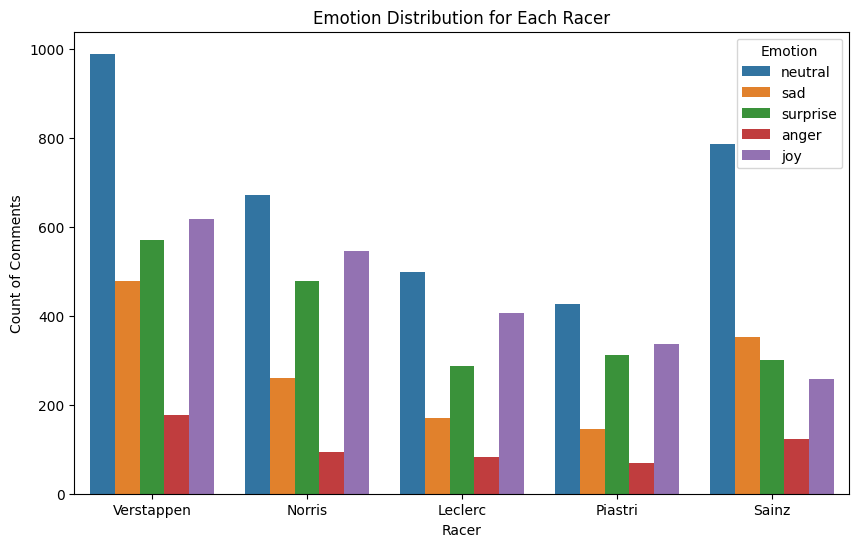

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='racer', hue='emotion')
plt.title("Emotion Distribution for Each Racer")
plt.xlabel("Racer")
plt.ylabel("Count of Comments")
plt.legend(title="Emotion")
plt.show()

<Figure size 1000x600 with 0 Axes>

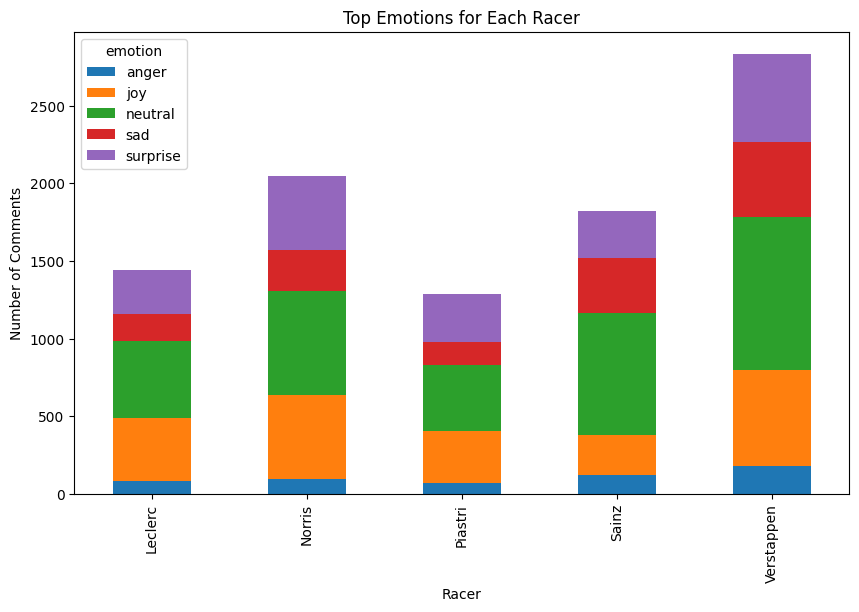

In [27]:
plt.figure(figsize=(10, 6))
emotion_counts = df.groupby(['racer', 'emotion']).size().unstack(fill_value=0)
emotion_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Top Emotions for Each Racer")
plt.xlabel("Racer")
plt.ylabel("Number of Comments")
plt.show()


<ipython-input-28-71969630474d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at'] = pd.to_datetime(df['published_at'])


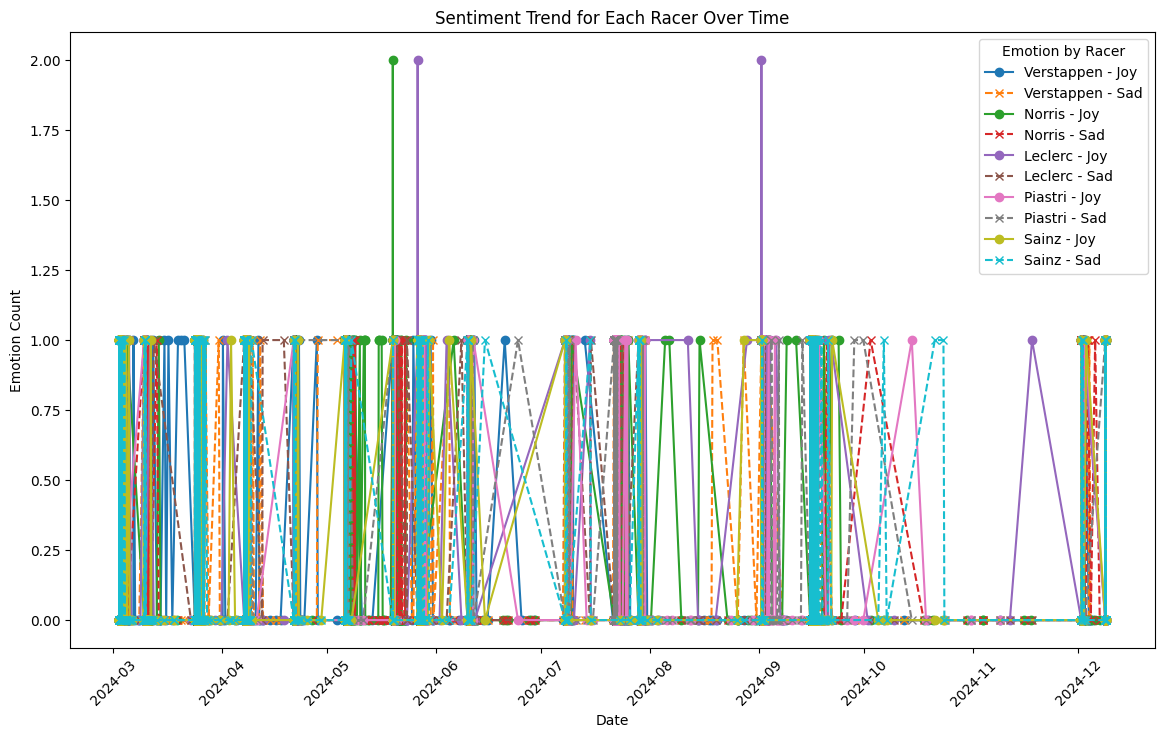

In [28]:

df['published_at'] = pd.to_datetime(df['published_at'])

sentiment_over_time = df.groupby(['published_at', 'racer', 'emotion']).size().unstack(fill_value=0).reset_index()


plt.figure(figsize=(14, 8))
for racer in racers:
    racer_data = sentiment_over_time[sentiment_over_time['racer'] == racer]
    plt.plot(racer_data['published_at'], racer_data['joy'], label=f"{racer} - Joy", linestyle='-', marker='o')
    plt.plot(racer_data['published_at'], racer_data['sad'], label=f"{racer} - Sad", linestyle='--', marker='x')


plt.xlabel('Date')
plt.ylabel('Emotion Count')
plt.title("Sentiment Trend for Each Racer Over Time")
plt.legend(title="Emotion by Racer", loc='best')
plt.xticks(rotation=45)
plt.show()


<ipython-input-41-d119988dcebb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive_racers.index, y=top_positive_racers.values, palette="viridis")


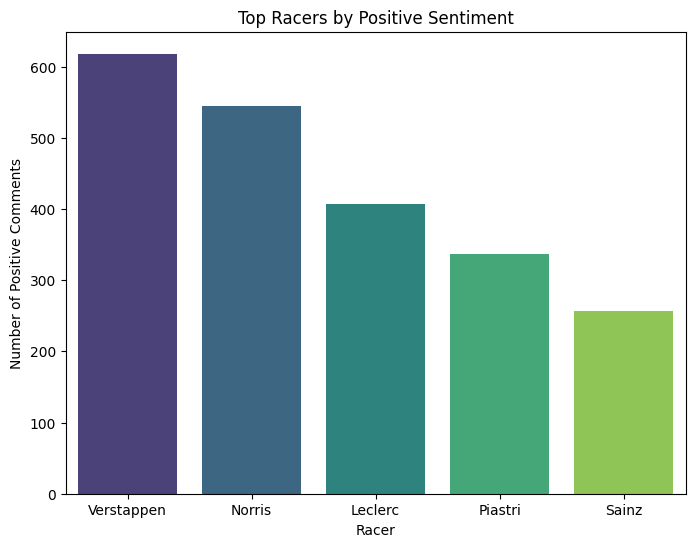

In [41]:
top_positive_racers = df[df['emotion'] == 'joy']['racer'].value_counts().nlargest(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_positive_racers.index, y=top_positive_racers.values, palette="viridis")
plt.title("Top Racers by Positive Sentiment")
plt.xlabel("Racer")
plt.ylabel("Number of Positive Comments")
plt.show()


<ipython-input-45-9b95f3633dba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative_racers.index, y=top_negative_racers.values, palette="viridis")


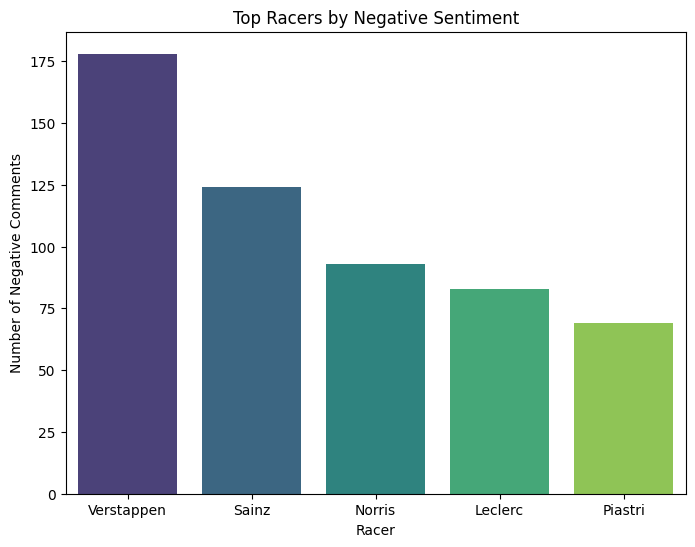

In [45]:
top_negative_racers = df[df['emotion'] == 'anger']['racer'].value_counts().nlargest(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_negative_racers.index, y=top_negative_racers.values, palette="viridis")
plt.title("Top Racers by Negative Sentiment")
plt.xlabel("Racer")
plt.ylabel("Number of Negative Comments")
plt.show()


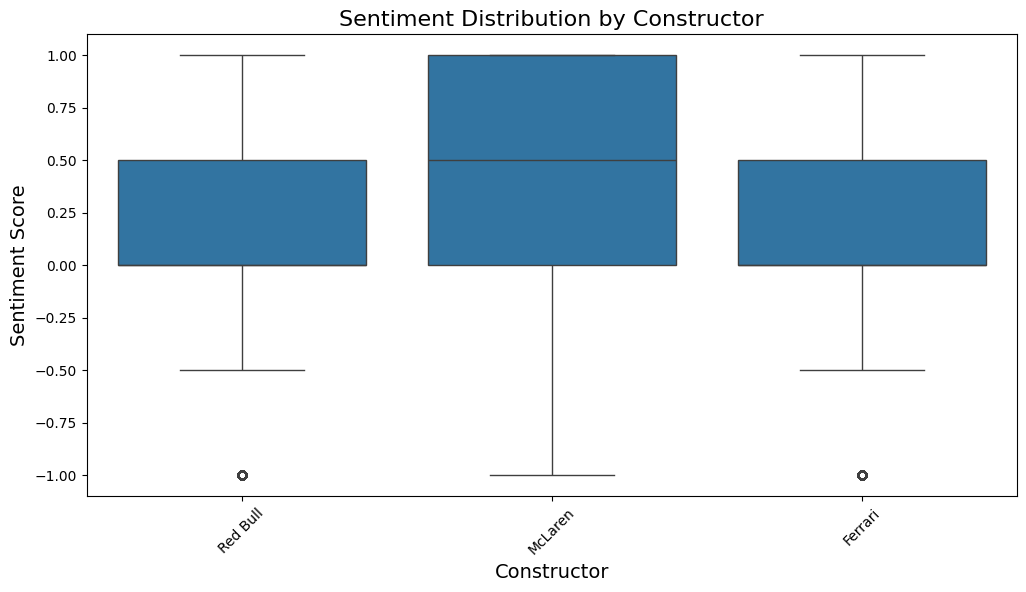

In [55]:
emotion_mapping = {
    'joy': 1,  # Assign a positive score for joy
    'surprise': 0.5,  # Assign a neutral score for surprise
    'neutral': 0,  # Assign a neutral score for neutral
    'sad': -0.5,  # Assign a negative score for sad
    'anger': -1  # Assign a negative score for anger
}
df['sentiment_score'] = df['emotion'].map(emotion_mapping)  # Create a sentiment score column

# Add a 'constructor' column (modify this to your logic)
# Assuming 'racers' is a list of racer names to constructor mapping
racer_to_constructor = {
    'Verstappen': 'Red Bull',
    'Norris': 'McLaren',
    'Leclerc': 'Ferrari',
    'Piastri': 'McLaren',
    'Sainz': 'Ferrari'
    # ... add other racers and their constructors
}
# Apply the mapping to create the 'constructor' column
df['constructor'] = df['racer'].map(racer_to_constructor)

# Create the boxplot
plt.figure(figsize=(12, 6))
# Here's the change: Pass the DataFrame to the `data` argument
sns.boxplot(data=df, x='constructor', y='sentiment_score')
plt.title('Sentiment Distribution by Constructor', fontsize=16)
plt.xlabel('Constructor', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Text(145.72222222222223, 0.5, 'Racer')

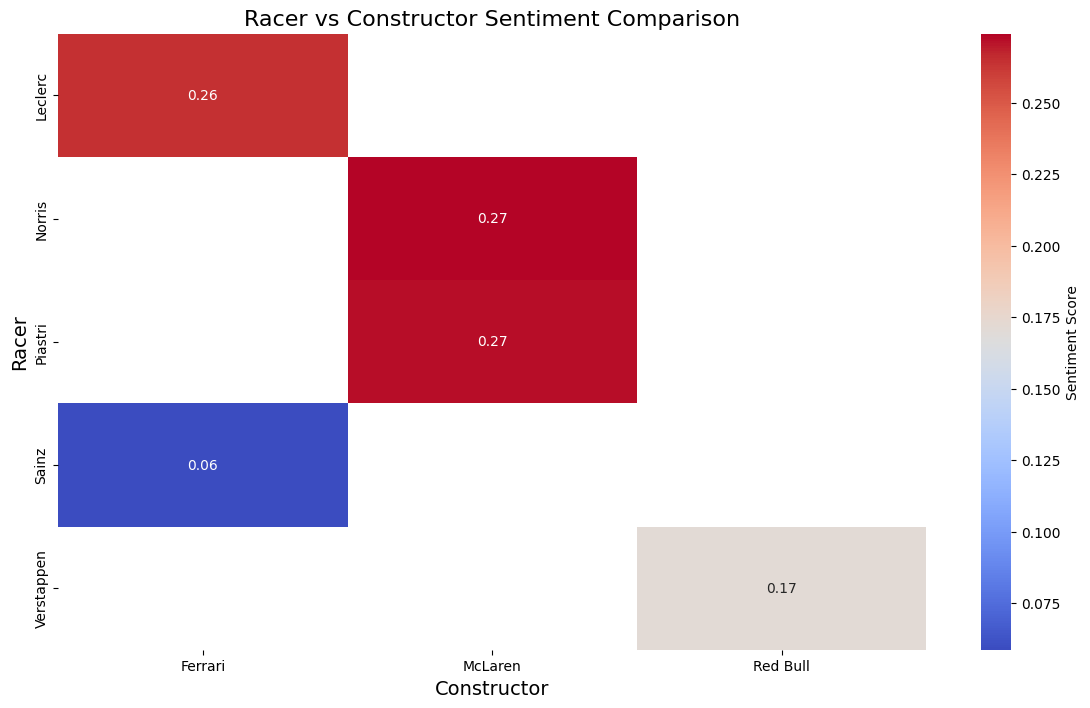

In [58]:
heatmap_data = df.groupby(['racer', 'constructor'])['sentiment_score'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Sentiment Score'})
plt.title('Racer vs Constructor Sentiment Comparison', fontsize=16)
plt.xlabel('Constructor', fontsize=14)
plt.ylabel('Racer', fontsize=14)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                            author          published_at  \
0            @michaelcortright5525  2024-12-08T16:02:35Z   
1                         @oreskec  2024-12-08T11:50:44Z   
2                       @Bilnation  2024-12-07T22:39:57Z   
3                   @anthonymg8870  2024-12-07T10:23:59Z   
4      @mykatiesdouglaskatie-kp1jg  2024-12-06T05:34:57Z   
...                            ...                   ...   
61922                  @AhmadRiyal  2024-07-28T15:49:24Z   
61923              @DayTimeRunners  2024-07-28T15:49:21Z   
61924                     @Topsu11  2024-07-28T15:49:20Z   
61925          @eliashargaming6143  2024-07-28T15:49:19Z   
61926                 @sameern9018  2024-07-28T15:49:15Z   

                 updated_at  like_count  \
0      2024-12-08T16:02:35Z         0.0   
1      2024-12-08T11:50:44Z         0.0   
2      2024-12-07T22:39:57Z         2.0   
3      2024-12-07T10:23:59Z         0.0   
4      2024-12-06T05:34:57Z         0.0   
...                  

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

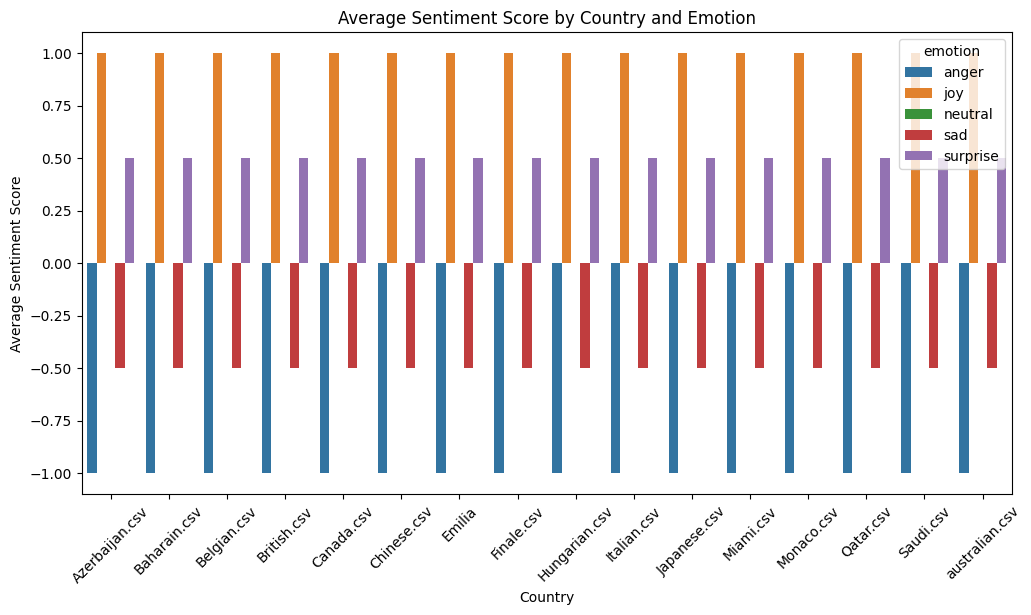

In [72]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Path to the zip file
zip_file_path = '/content/Data.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get a list of all CSV files within the archive
    csv_files = [file for file in zip_ref.namelist() if file.endswith('.csv')]

    dataframes = []
    # Iterate through each CSV file
    for csv_file in csv_files:
        # Read the CSV file directly from the zip archive
        with zip_ref.open(csv_file, 'r') as file:
            df = pd.read_csv(file)
            # Add a new column 'csv_filename' to store the filename
            df['csv_filename'] = csv_file  # Store the filename
            dataframes.append(df)

# Concatenate all dataframes
df = pd.concat(dataframes, ignore_index=True)
print(df)

# ... (Rest of your code that creates the 'emotion' column should be here) ...
# for example
racers = ['Verstappen', 'Norris', 'Leclerc', 'Piastri', 'Sainz' ]  # Replace with actual racer names
def identify_racer(text):
    if isinstance(text, str):  # Only process if text is a string
        mentioned_racers = [racer for racer in racers if racer.lower() in text.lower()]
        return mentioned_racers[0] if mentioned_racers else None
    return None
df['racer'] = df['text'].apply(identify_racer)
df = df.dropna(subset=['racer'])

sia = SentimentIntensityAnalyzer()
def get_emotion(text):
    score = sia.polarity_scores(text)

    if score['compound'] >= 0.6:
        return 'joy'
    elif score['compound'] >= 0.2:
        return 'surprise'
    elif score['compound'] > -0.2:
        return 'neutral'
    elif score['compound'] > -0.6:
        return 'sad'
    else:
        return 'anger'
df['emotion'] = df['text'].apply(get_emotion)

emotion_mapping = {
    'joy': 1,  # Assign a positive score for joy
    'surprise': 0.5,  # Assign a neutral score for surprise
    'neutral': 0,  # Assign a neutral score for neutral
    'sad': -0.5,  # Assign a negative score for sad
    'anger': -1  # Assign a negative score for anger
}
df['sentiment_score'] = df['emotion'].map(emotion_mapping)
# ...

def get_country_from_filename(filename):
    country = filename.split("_")[0]
    return country

df['country'] = df['csv_filename'].apply(get_country_from_filename)
# Add a new column to store sentiment for each individual comment
df['comment_sentiment'] = df['text'].apply(get_emotion)

# Group by country and racer, calculate sentiment distribution for each group
country_racer_sentiment = df.groupby(['country', 'racer', 'comment_sentiment'])['text'].count().reset_index(name='comment_count')

# Now you can group by 'country' and 'emotion':
country_sentiment = df.groupby(['country', 'emotion'])['sentiment_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=country_sentiment, x='country', y='sentiment_score', hue='emotion')
plt.title('Average Sentiment Score by Country and Emotion')
plt.xlabel('Country')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt

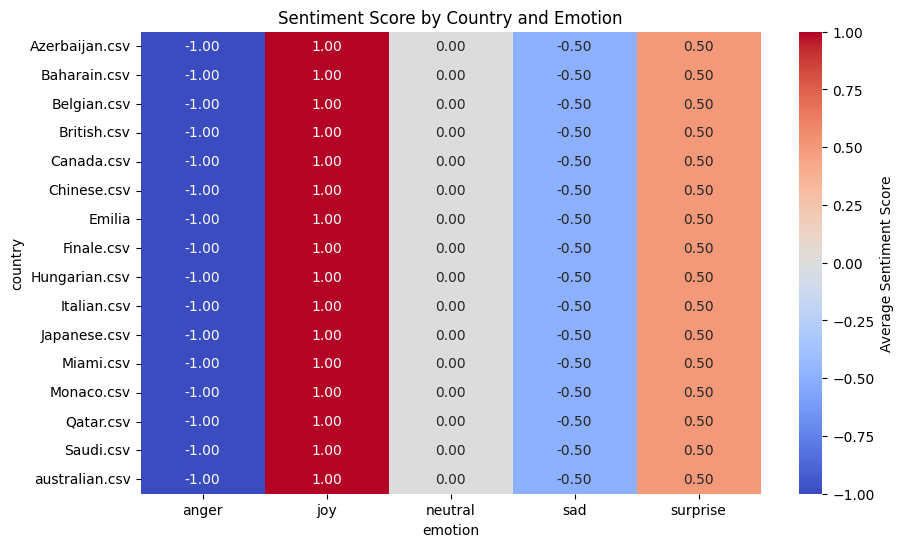

In [66]:
heatmap_data = country_sentiment.pivot(index='country', columns='emotion', values='sentiment_score')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Sentiment Score'})
plt.title('Sentiment Score by Country and Emotion')
plt.show()


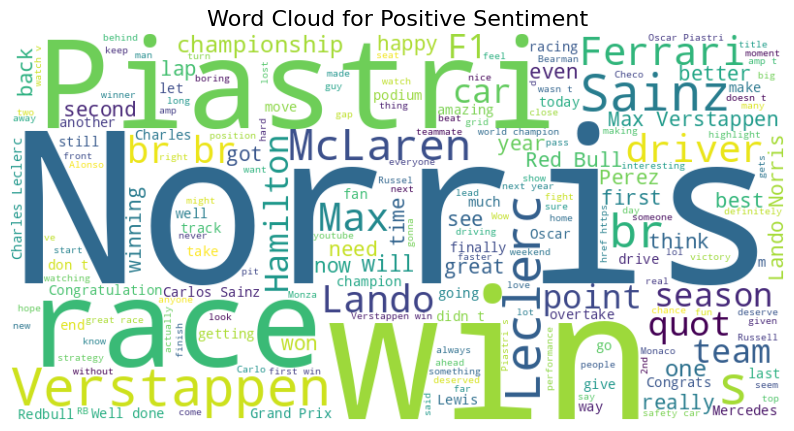

In [68]:
from wordcloud import WordCloud

# Generating positive sentiment word cloud
positive_text = " ".join(df[df['sentiment_score'] > 0]['text'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment', fontsize=16)
plt.axis('off')
plt.show()

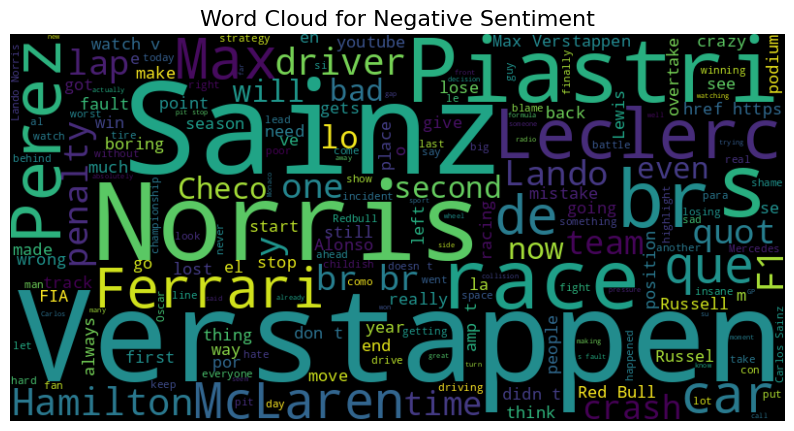

In [71]:
negative_text = " ".join(df[df['sentiment_score'] < 0]['text'])
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment', fontsize=16)
plt.axis('off')
plt.show()

# Section 7: Time-based analysis


 This section focuses on time-based trends in comment volume and sentiment for specific racers and teams.


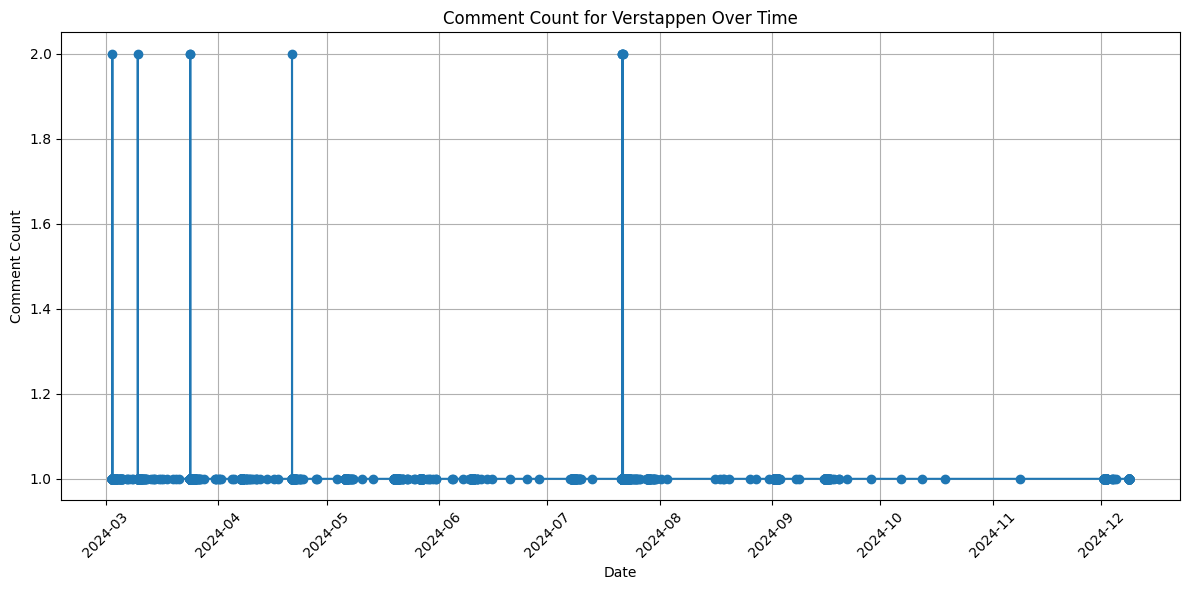

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'published_at' to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# Group by date and racer, counting comments
comment_count_over_time = df.groupby(['published_at', 'racer'])['text'].count().reset_index(name='comment_count')

# Select the racer you want to visualize (e.g., 'Verstappen')
selected_racer = 'Verstappen'  # Replace with your desired racer

# Filter data for the selected racer
racer_data = comment_count_over_time[comment_count_over_time['racer'] == selected_racer]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(racer_data['published_at'], racer_data['comment_count'], marker='o', linestyle='-')
plt.title(f'Comment Count for {selected_racer} Over Time')
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

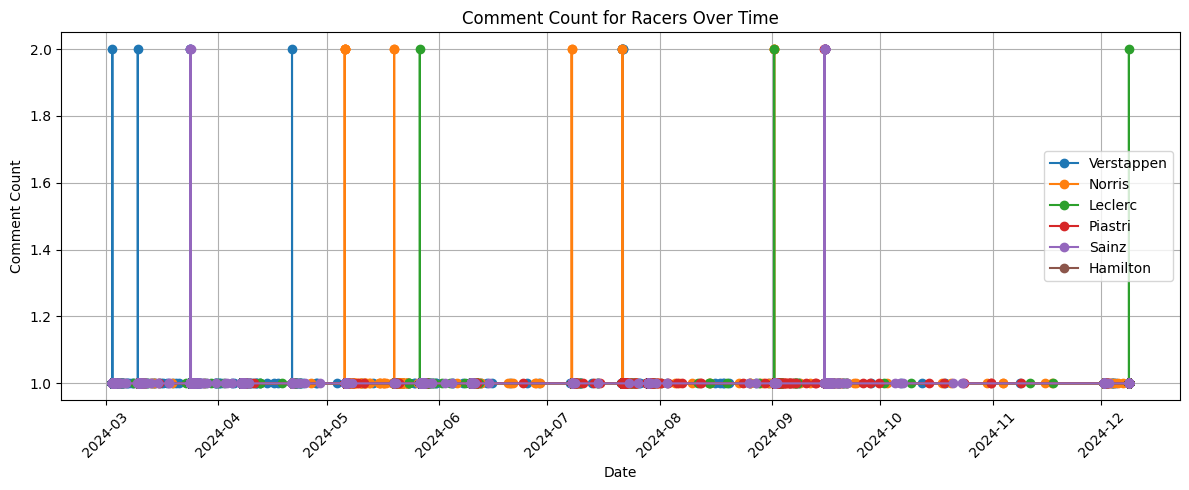

In [40]:
# Plotting for multiple racers
plt.figure(figsize=(12, 5))
for racer in racers:  # Assuming 'racers' is a list of racer names
    racer_data = comment_count_over_time[comment_count_over_time['racer'] == racer]
    plt.plot(racer_data['published_at'], racer_data['comment_count'], marker='o', linestyle='-', label=racer)

plt.title('Comment Count for Racers Over Time')
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')  # Add a legend to identify racers
plt.tight_layout()
plt.show()

<ipython-input-51-05c7d49f6beb>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  constructor_sentiment['sentiment_score'].fillna(0, inplace=True)  # Or constructor_sentiment.dropna(subset=['sentiment_score'], inplace=True)


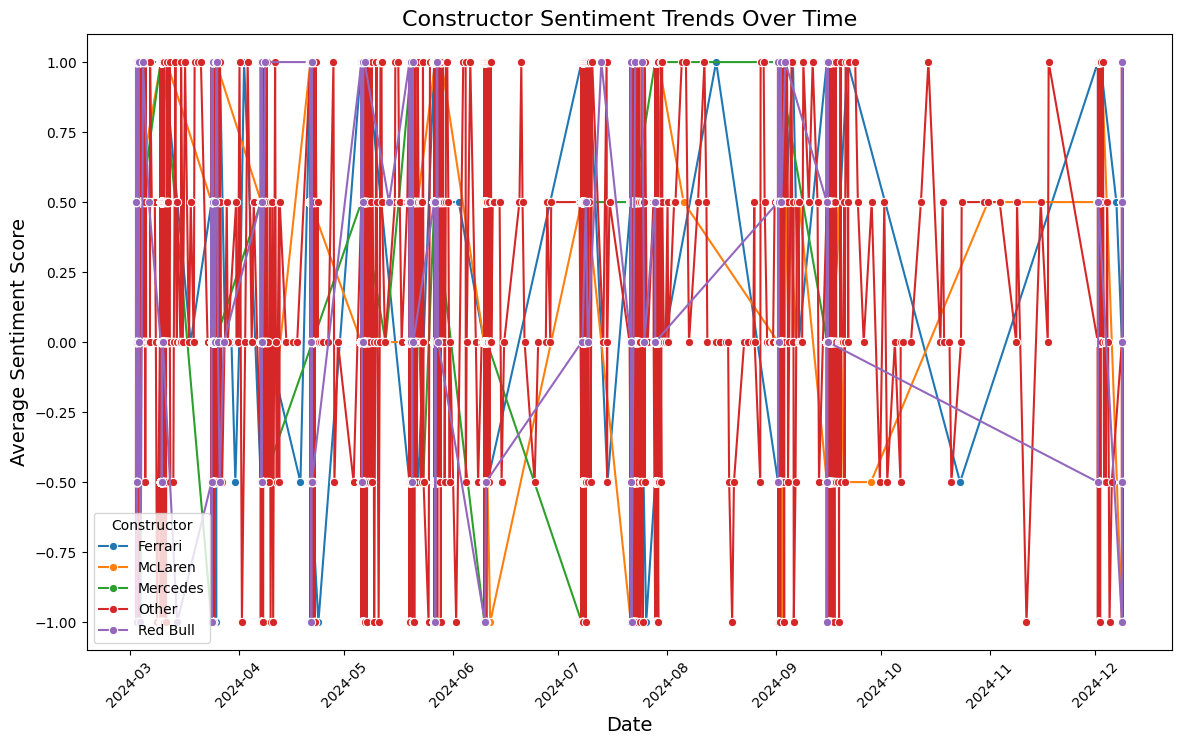

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'published_at' to datetime
constructor_sentiment['published_at'] = pd.to_datetime(constructor_sentiment['published_at'])

# Create a proper sentiment score (using a dictionary mapping emotions to scores)
emotion_mapping = {
    'joy': 1,  # Assign a positive score for joy
    'surprise': 0.5,  # Assign a neutral score for surprise
    'neutral': 0,  # Assign a neutral score for neutral
    'sad': -0.5,  # Assign a negative score for sad
    'anger': -1  # Assign a negative score for anger
}
constructor_sentiment['sentiment_score'] = constructor_sentiment['emotion'].map(emotion_mapping)

# 2. Aggregate sentiment score (e.g., average) for plotting
constructor_sentiment = constructor_sentiment.groupby(['constructor', 'published_at'])['sentiment_score'].mean().reset_index()

# 3. Check for NaN values and replace with 0 or drop them
constructor_sentiment['sentiment_score'].fillna(0, inplace=True)  # Or constructor_sentiment.dropna(subset=['sentiment_score'], inplace=True)


# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=constructor_sentiment,
             x='published_at',
             y='sentiment_score',
             hue='constructor',
             marker='o')
plt.title('Constructor Sentiment Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.legend(title='Constructor')
plt.xticks(rotation=45)
plt.show()